# Método del Codo y el Factor de Silueta del Clustering

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from warnings import filterwarnings
filterwarnings("ignore")
style.use("ggplot")

- Dado un punto cualquiera del dataset, definimos
	- Como de bien el punto está unido al resto de puntos de su cluster.
	- $a(i)$ = el promedio de la distancia `i` a cada uno de los otros puntos del mismo cluster (Cuanto menor sea el valor, mejor ha sido asignado el punto).
	
	- Como bien está el punto separado de los puntos del cluster vecino más cercano.
	- $b(i)$  = La menor distancia promedio del punto `i` a cualquier otro cluster que no contenga `i` (dicho cluster es el vecino más cercano de `i`, ya que es la mejor alternativa de clasificación del punto).
    
   
#### $$S(i) = \frac{b(i)-a(i)}{\max{a(i),b(i)}}$$, $$S(i) =\left\{\begin{array}{rr}
\\ 1- \frac{a(i)}{b(i)} & \text{Si } a(i)<b(i)
\\ 0 & \ si \ a(i)=b(i)
\\  \frac{b(i)}{a(i)}- 1& \text{Si } a(i)>b(i)
\end{array} \right.$$

#### **<center> Donde** $$-1 \leq S(i) \leq 1$$


- Cuando S(i) tiende a 1 entonces a(i)< b(i), por lo tanto, el punto está muy bien clasificado.
- Cuando S(i) tiende a -1 entonces a(i)> b(i), por lo tanto, el punto estaría mejor en su cluster vecino.
- El promedio de S(i) sobre todos los punto posibles de un cluster nos informa de cómo de bien agrupados están.


### Número Óptimo

- El promedio de los coeficientes de silueta de todos los puntos del dataset se puede usar para decidir el número de óptimo de Clusters.

	1. Empezamos con dos clusters y calculamos la silueta de cada cluster.
	2. Calculamos la silueta promedio de todo el data set.
	3. Si la silueta promedio de algún cluster es muy inferior al promedio global, el número de clusters es subóptimo y debemos elegir uno más.
	4. Repetimos los pasos 1 a 3 para diferentes número de Clusters hasta alcanzar un valor óptimo según el contexto o siluetas similares (n=6 hasta 10 por ejemplo).
	5. Decidimos el candidato potencial en función de los resultados obtenidos.

In [2]:
x1 = np.array([3,1,1,2,1,6,6,5,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
x = np.array(list(zip(*[x1,x2]))); x.shape
x

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [5, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

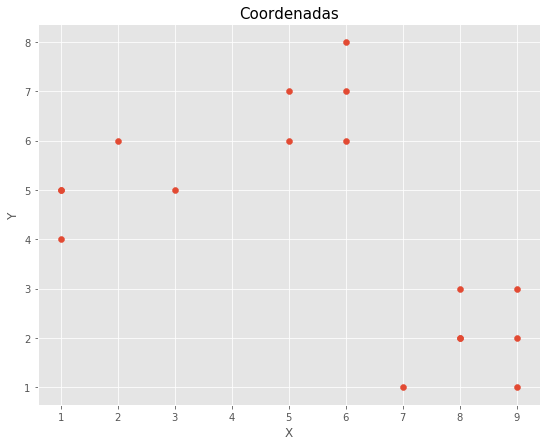

In [3]:
plt.figure(figsize=(9,7))
plt.scatter(x[:,0],x[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Coordenadas",size=15)
plt.show()

In [4]:
plt.cm.Spectral(13.21)

(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)

In [5]:
max_k = 10 # Máximo Número de Clusters que vamos a crear
K = range(1,max_k)
ssw = [] # Suma de los cuadráticos internos
color_pallete = [plt.cm.Spectral(float(i)/max_k) for i in K]
# Colormap objects based on lookup tables using linear segments.
# The lookup table is generated using linear interpolation for each
# primary color, with the 0-1 domain divided into any number of
# segments.

centroid = [sum(x)/len(x) for i in K]
centroid

[array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765]),
 array([5.52941176, 4.29411765])]

In [6]:
cdist(x,centroid,"euclidean",p=2), cdist(x,centroid,"euclidean",p=2).shape

(array([[2.6260605 , 2.6260605 , 2.6260605 , 2.6260605 , 2.6260605 ,
         2.6260605 , 2.6260605 , 2.6260605 , 2.6260605 ],
        [4.53895099, 4.53895099, 4.53895099, 4.53895099, 4.53895099,
         4.53895099, 4.53895099, 4.53895099, 4.53895099],
        [4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 ,
         4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 ],
        [3.92004873, 3.92004873, 3.92004873, 3.92004873, 3.92004873,
         3.92004873, 3.92004873, 3.92004873, 3.92004873],
        [4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 ,
         4.5840856 , 4.5840856 , 4.5840856 , 4.5840856 ],
        [3.73564148, 3.73564148, 3.73564148, 3.73564148, 3.73564148,
         3.73564148, 3.73564148, 3.73564148, 3.73564148],
        [1.76960105, 1.76960105, 1.76960105, 1.76960105, 1.76960105,
         1.76960105, 1.76960105, 1.76960105, 1.76960105],
        [2.75718627, 2.75718627, 2.75718627, 2.75718627, 2.75718627,
         2.75718627, 2.75718627, 2.7571862

In [7]:
# Calculo de la distancia euclidiana
np.sqrt((x[0][0]-centroid[0][0])**2+(x[0][1]-centroid[0][1])**2)

2.6260605041823193

In [8]:
sst = sum(np.min(cdist(x,centroid,"euclidean"),axis=1))
sst

58.83700389835835

In [9]:
np.min(cdist(x,centroid,"euclidean"),axis=1)

array([2.6260605 , 4.53895099, 4.5840856 , 3.92004873, 4.5840856 ,
       3.73564148, 1.76960105, 2.75718627, 1.78614429, 2.74649824,
       3.60747014, 3.37146585, 4.78499674, 3.37146585, 3.70401447,
       4.16028346, 2.78900461])

In [10]:
kmeanModel = KMeans(n_clusters=2).fit(x)
kmeanModel.labels_, kmeanModel.cluster_centers_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([[8.28571429, 2.        ],
        [3.6       , 5.9       ]]))

In [11]:
max_k=10 # Máximo Número de Clusters que vamos a crear
K=range(1,max_k)
ssw = [] #Suma de los cuadrádos internos
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
# Colormap objects based on lookup tables using linear segments.
# The lookup table is generated using linear interpolation for each
# primary color, with the 0-1 domain divided into any number of
# segments.

centroid=[sum(x)/len(x) for i in K]
sst=sum(np.min(cdist(x,centroid,'euclidean'),axis=1))
# Cdist mide la distancia de las dos variables que le pongas 
sst

58.83700389835835

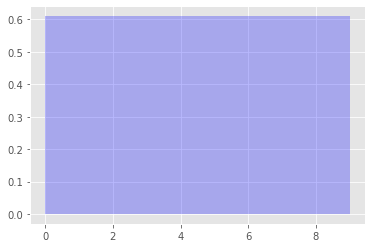

In [12]:
fig, axis1 = plt.subplots(1)
axis1.fill_between(np.arange(0,10),0, .61, facecolor = "blue", alpha = 0.27)
plt.show()

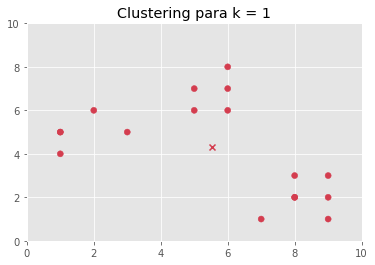

* Para k =  2  el promedio de la silueta es de : 0.6201052236914554
   - Para i =  1  la silueta del cluster vale :  0.7762884185008893
   - Para i =  2  la silueta del cluster vale :  0.5107769873248517


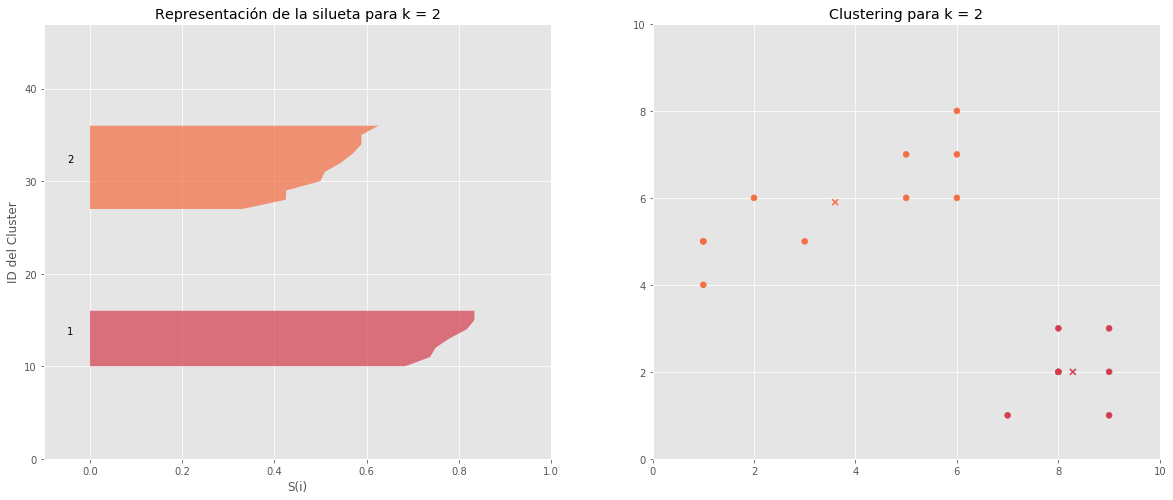

* Para k =  3  el promedio de la silueta es de : 0.6985701138367664
   - Para i =  1  la silueta del cluster vale :  0.7392634135814754
   - Para i =  2  la silueta del cluster vale :  0.6938229180605288
   - Para i =  3  la silueta del cluster vale :  0.6463466899704113


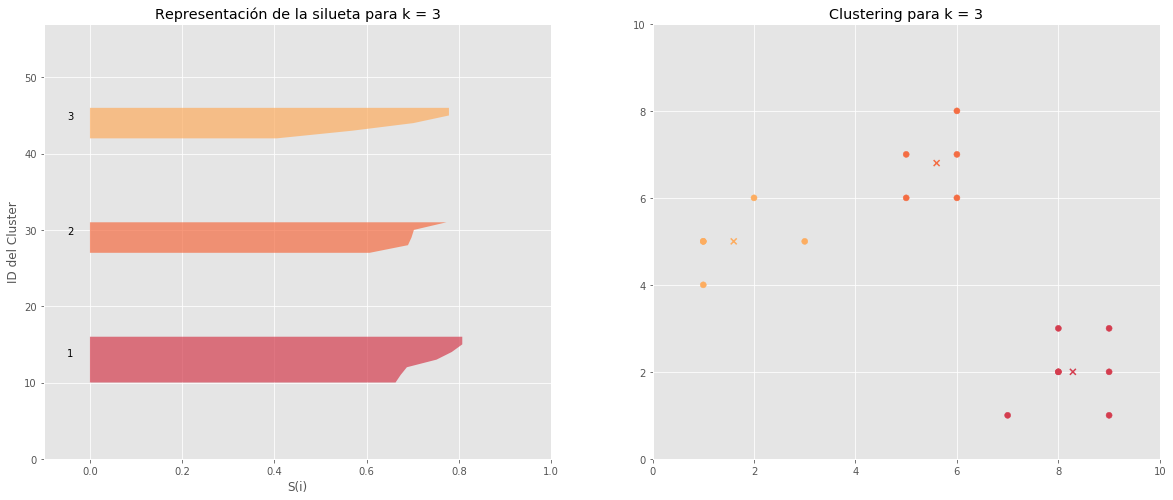

* Para k =  4  el promedio de la silueta es de : 0.6256553860124547
   - Para i =  1  la silueta del cluster vale :  0.7392634135814754
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.6024718219831042
   - Para i =  4  la silueta del cluster vale :  0.655666655624379


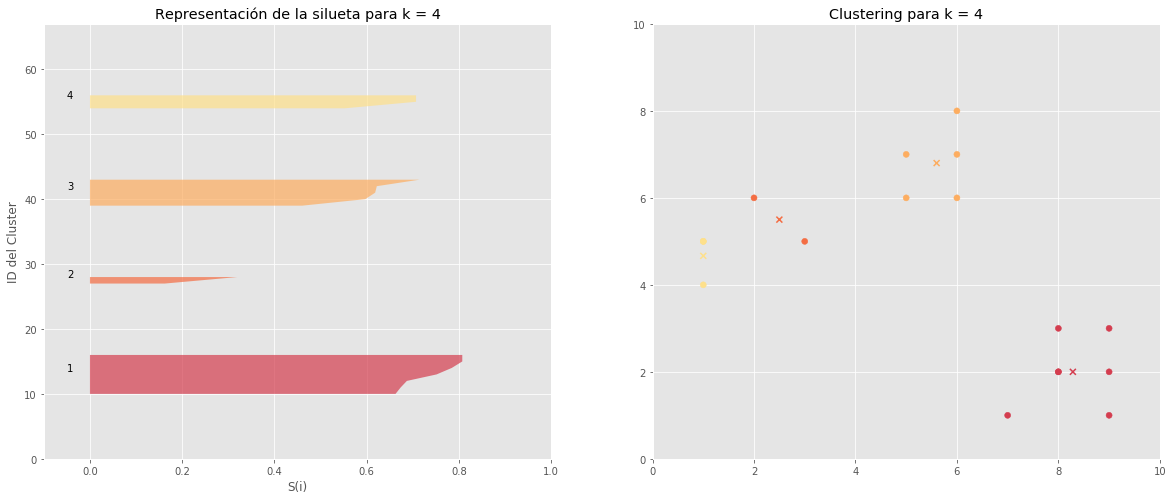

* Para k =  5  el promedio de la silueta es de : 0.4135488377067625
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.2698039021743969
   - Para i =  3  la silueta del cluster vale :  0.6024718219831042
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.1899052168375926


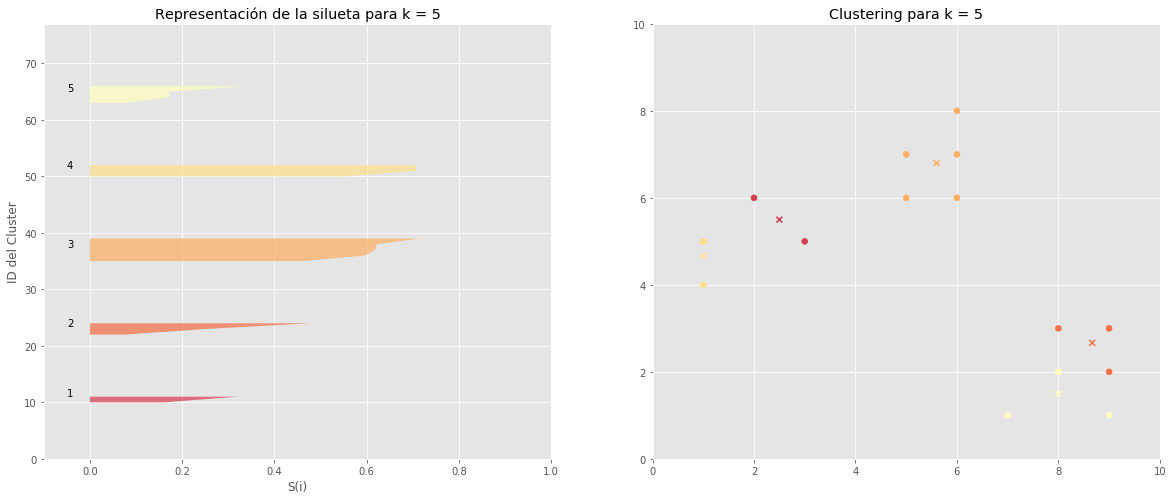

* Para k =  6  el promedio de la silueta es de : 0.35245817857622663
   - Para i =  1  la silueta del cluster vale :  0.37765685097302226
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.3376275052000045
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.20055145411061034
   - Para i =  6  la silueta del cluster vale :  0.0


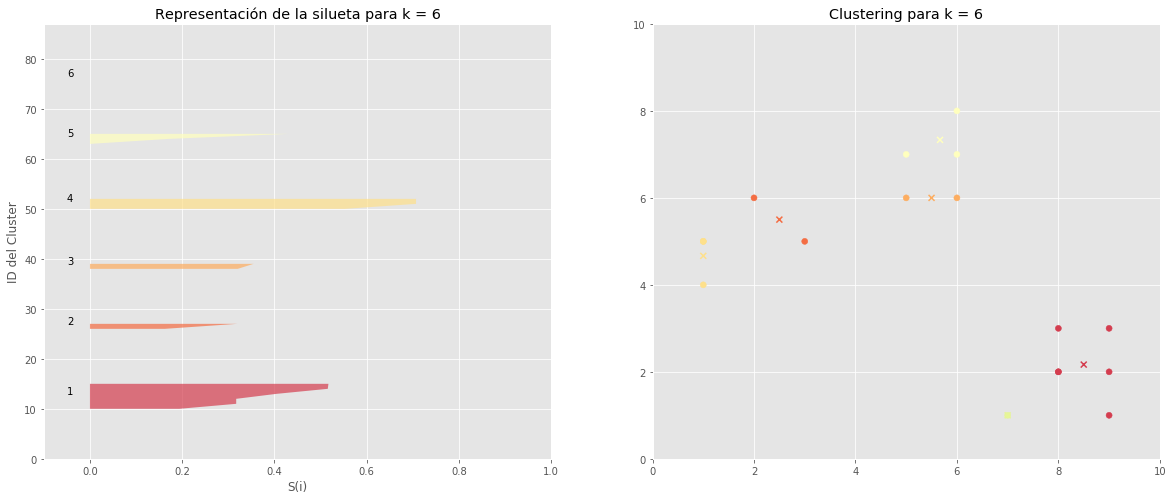

* Para k =  7  el promedio de la silueta es de : 0.3565856421404507
   - Para i =  1  la silueta del cluster vale :  0.655666655624379
   - Para i =  2  la silueta del cluster vale :  0.2751262658470836
   - Para i =  3  la silueta del cluster vale :  0.20055145411061034
   - Para i =  4  la silueta del cluster vale :  0.31256470041698214
   - Para i =  5  la silueta del cluster vale :  0.24096929517637128
   - Para i =  6  la silueta del cluster vale :  0.3376275052000045
   - Para i =  7  la silueta del cluster vale :  0.3869086846339371


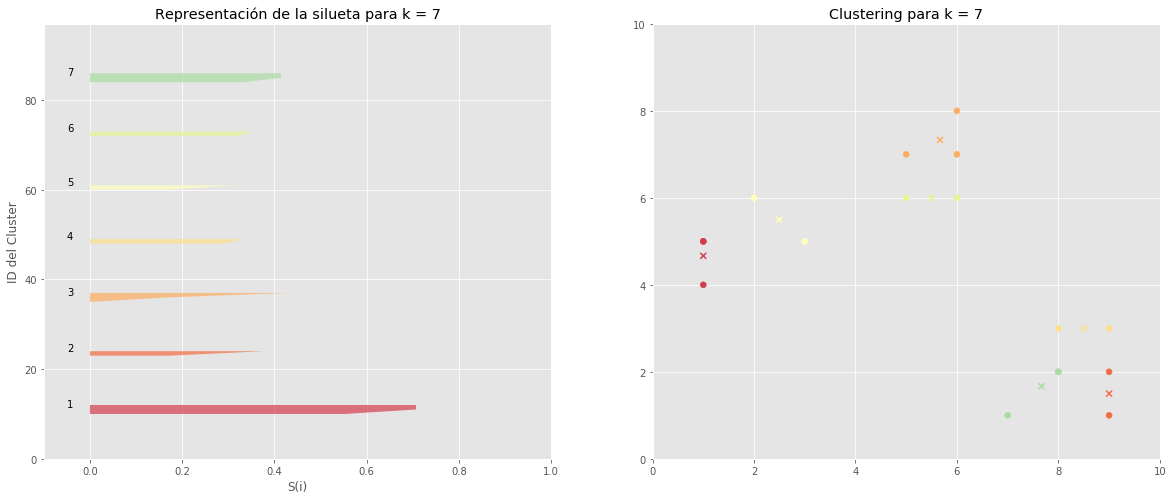

* Para k =  8  el promedio de la silueta es de : 0.30975793159100584
   - Para i =  1  la silueta del cluster vale :  0.2951866746779856
   - Para i =  2  la silueta del cluster vale :  0.20382042637679978
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.39052429175126996
   - Para i =  5  la silueta del cluster vale :  0.21578640081927955
   - Para i =  6  la silueta del cluster vale :  0.24096929517637128
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0


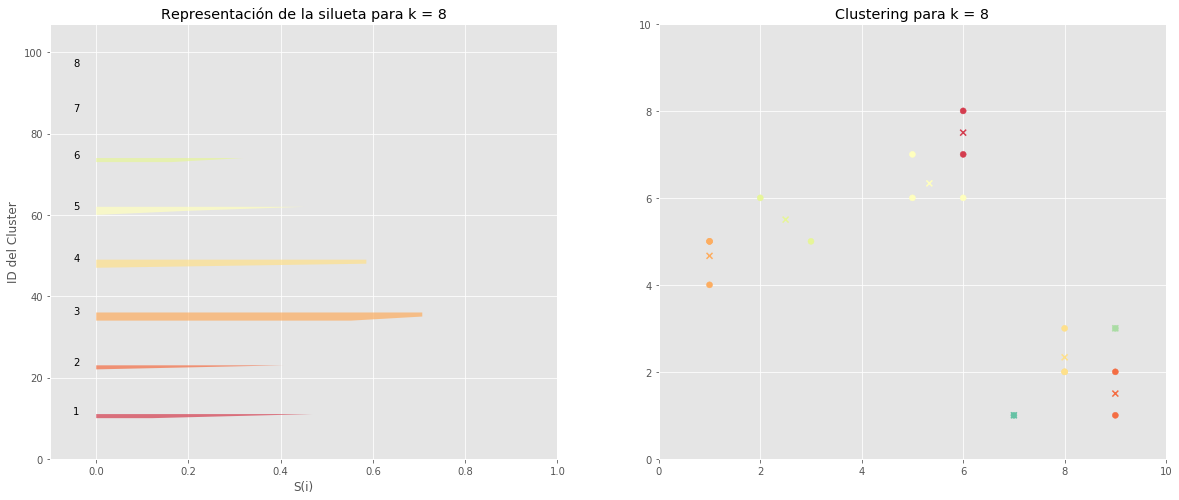

* Para k =  9  el promedio de la silueta es de : 0.276576630826632
   - Para i =  1  la silueta del cluster vale :  0.6152265411044983
   - Para i =  2  la silueta del cluster vale :  0.39052429175126996
   - Para i =  3  la silueta del cluster vale :  0.20055145411061034
   - Para i =  4  la silueta del cluster vale :  0.3376275052000045
   - Para i =  5  la silueta del cluster vale :  0.20382042637679978
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.0


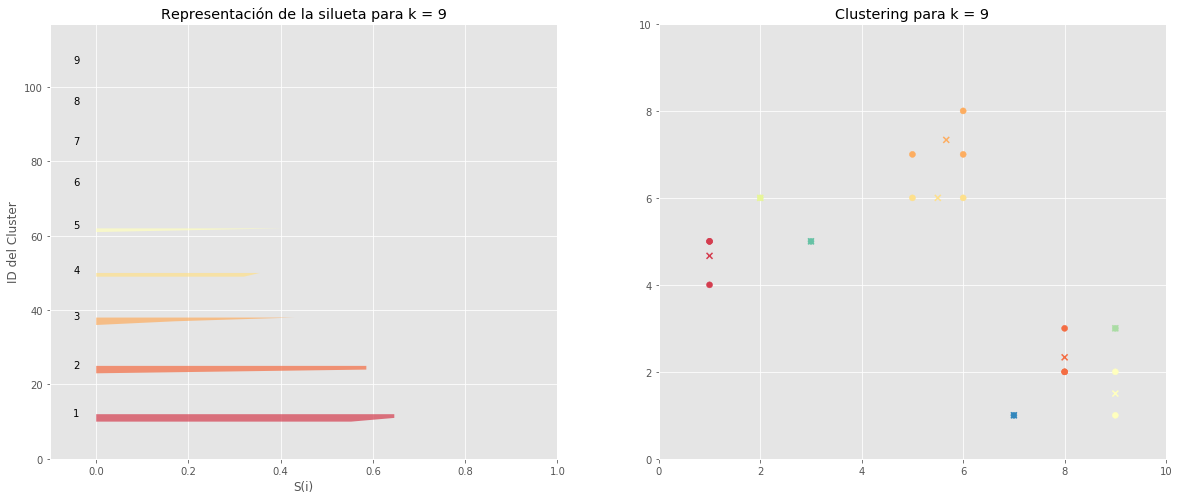

In [13]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(x, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(x):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(x)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(x, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(x, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette[:k], marker = "x")
    plt.show()

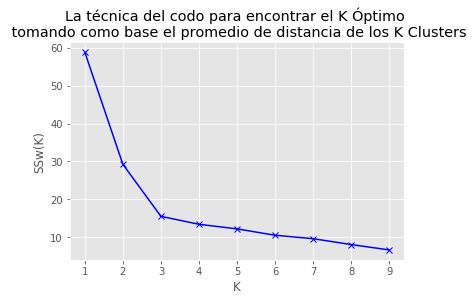

In [14]:
# Representación del codo
plt.plot(K, ssw,"bx-")
plt.xlabel("K")
plt.ylabel("SSw(K)")
plt.title("La técnica del codo para encontrar el K Óptimo \n tomando como base el promedio de distancia de los K Clusters")
plt.show()

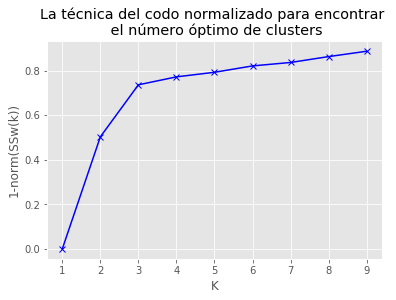

In [15]:
# Representación del codo normalizado
# 1-ssw/sst
plt.plot(K, 1-ssw/sst,"bx-")
plt.xlabel("K")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar \n el número óptimo de clusters")
plt.show()